In [1]:
import itertools

import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete


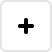
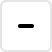
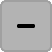
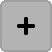
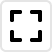
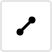
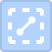
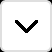
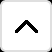
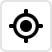
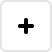
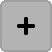
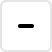
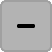
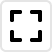
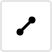
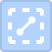
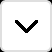
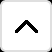
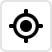

In [2]:
LetsPlot.setup_html()

In [3]:
n = 5
xs = [i * 10**(-5) for i in range(n)]
ys = [0] * len(xs)

gggrid([
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        ggtitle("Форматирование по умолчанию", "Superscript выбирается автоматически"),
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(format='.5f') + \
        ggtitle("Ручное форматирование", "Float-представление"),
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(format='.3e') + \
        ggtitle("Ручное форматирование с e-нотацией", "Настраиваемый superscript"),
    ggplot(dict(x=xs, y=ys), aes('x', 'y')) + \
        geom_point() + \
        scale_x_continuous(format='.1s') + \
        ggtitle("Ручное форматирование с s-нотацией", "Десятичные СИ-приставки"),
], ncol=2)

In [4]:
ggplot(dict(x=[2.718281828459 * 10**(-9)], y=[2.718281828459 * 10**(-9)]), aes('x', 'y')) + \
    geom_point(tooltips=layer_tooltips().format('@x', '.3e').format('@y', 'e')
                       .title('^x')\
                       .line('@|@x')\
                       .line('@|@y')\
                       .line('Две формулы в строке|(@x, @y)')) + \
    ggsize(600, 600) + \
    ggtitle("В подсказке")

In [5]:
data = {
    'name': ['a', 'b', 'c'],
    'value': [10**(-5), 3*10**(-5), 6*10**(-5)]
}

ggplot(data) + \
    geom_pie(aes(fill=as_discrete('name', order_by='..count..'), weight='value'), \
             size=15, hole=0.2, \
             labels=layer_labels().line("_____").format('@..count..', '.0e').line('@..count..')) + \
    ggtitle("В аннотации")

In [6]:
ggplot() + \
    geom_point(x=10**(-5), y=0) + \
    ggtitle("В заголовке в виде явной формулы: \(10^{-5}\)")

In [7]:
tests = {
    "Нулевая степень": 1,
    "Первая степень": 10,
    "Степень десятки": 10**15,
    "С коэффициентом": 1.5 * 10**15,
    "Отрицательный коэффициент": -1.5 * 10**15,
    "Отрицательная степень": 1.5 * 10**(-15),
}

gggrid([
    ggplot() + \
        geom_label(x=x, y=0, label=str(x), label_format='.1e') + \
        ggtitle("Superscript-форматирование", title)
    for title, x in tests.items()
], ncol=3)

In [8]:
x = 1.5 * 10**(-15)
sizes = [5, 14]
fontfaces = ['bold', 'italic']
families = ["Times", "Courier"]

gggrid([
    ggplot() + \
        geom_label(x=x, y=0, label=str(x), label_format='.3e', \
                   size=size, fontface=fontface, family=family) + \
        ggtitle("Шрифт: {0}, {1}, {2}pt".format(family, fontface, size))
    for size, fontface, family in itertools.product(sizes, fontfaces, families)
], ncol=4)

In [9]:
x = 1.5 * 10**(-15)
tests = [
    "@x",
    "@x/",
    "/@x",
    "@x\\",
    "\\@x",
    "\\ @x",
]

gggrid([
    ggplot(dict(x=[x], y=[0]), aes('x', 'y')) + \
        geom_pie(color="black", fill="white", \
                 labels=layer_labels().format("@x", ".1e").line(label)) + \
        ggtitle("Шаблон: '{0}'".format(label))
    for label in tests
], ncol=3)

In [10]:
x = 1.5 * 10**(-15)
tests = [0, 15, 45, 90, 180, -90]

gggrid([
    ggplot() + \
        geom_label(x=x, y=0, label=str(x), label_format='.1e', angle=angle) + \
        ggtitle("Поворот на {0}°".format(angle))
    for angle in tests
], ncol=3)

In [11]:
# Regression test

mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')

fl_df = mpg_df.groupby(['cty', 'hwy']).fl.agg(pd.Series.mode).to_frame('fl').reset_index()

ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_label(aes(label='fl'))

In [12]:
# Regression test

ggplot() + geom_text(x=0, y=0, label="_____\n\(10^{-10}\)")

In [13]:
# Regression test

label = ["-1.5·\(10^{-8}\)", "-1.5·\(10^{-8}\)\n1.5\n1.5·\(10^8\)"]
x = list(range(len(label)))
y = [0] * len(label)

ggplot(dict(x=x, y=y, label=label), aes('x', 'y')) + geom_label(aes(label='label')) + xlim(-1, len(label))